<a href="https://colab.research.google.com/github/Vineetttt/IPCV/blob/main/Region_Growing_Merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-cb9cd534eedc>:61: RuntimeWarning: overflow encountered in scalar subtract
  if y < width - 1 and abs(image[x, y] - image[x, y+1]) < threshold:
<ipython-input-3-cb9cd534eedc>:57: RuntimeWarning: overflow encountered in scalar subtract
  if x < height - 1 and abs(image[x, y] - image[x+1, y]) < threshold:
<ipython-input-3-cb9cd534eedc>:55: RuntimeWarning: overflow encountered in scalar subtract
  if x > 0 and abs(image[x, y] - image[x-1, y]) < threshold:
<ipython-input-3-cb9cd534eedc>:59: RuntimeWarning: overflow encountered in scalar subtract
  if y > 0 and abs(image[x, y] - image[x, y-1]) < threshold:


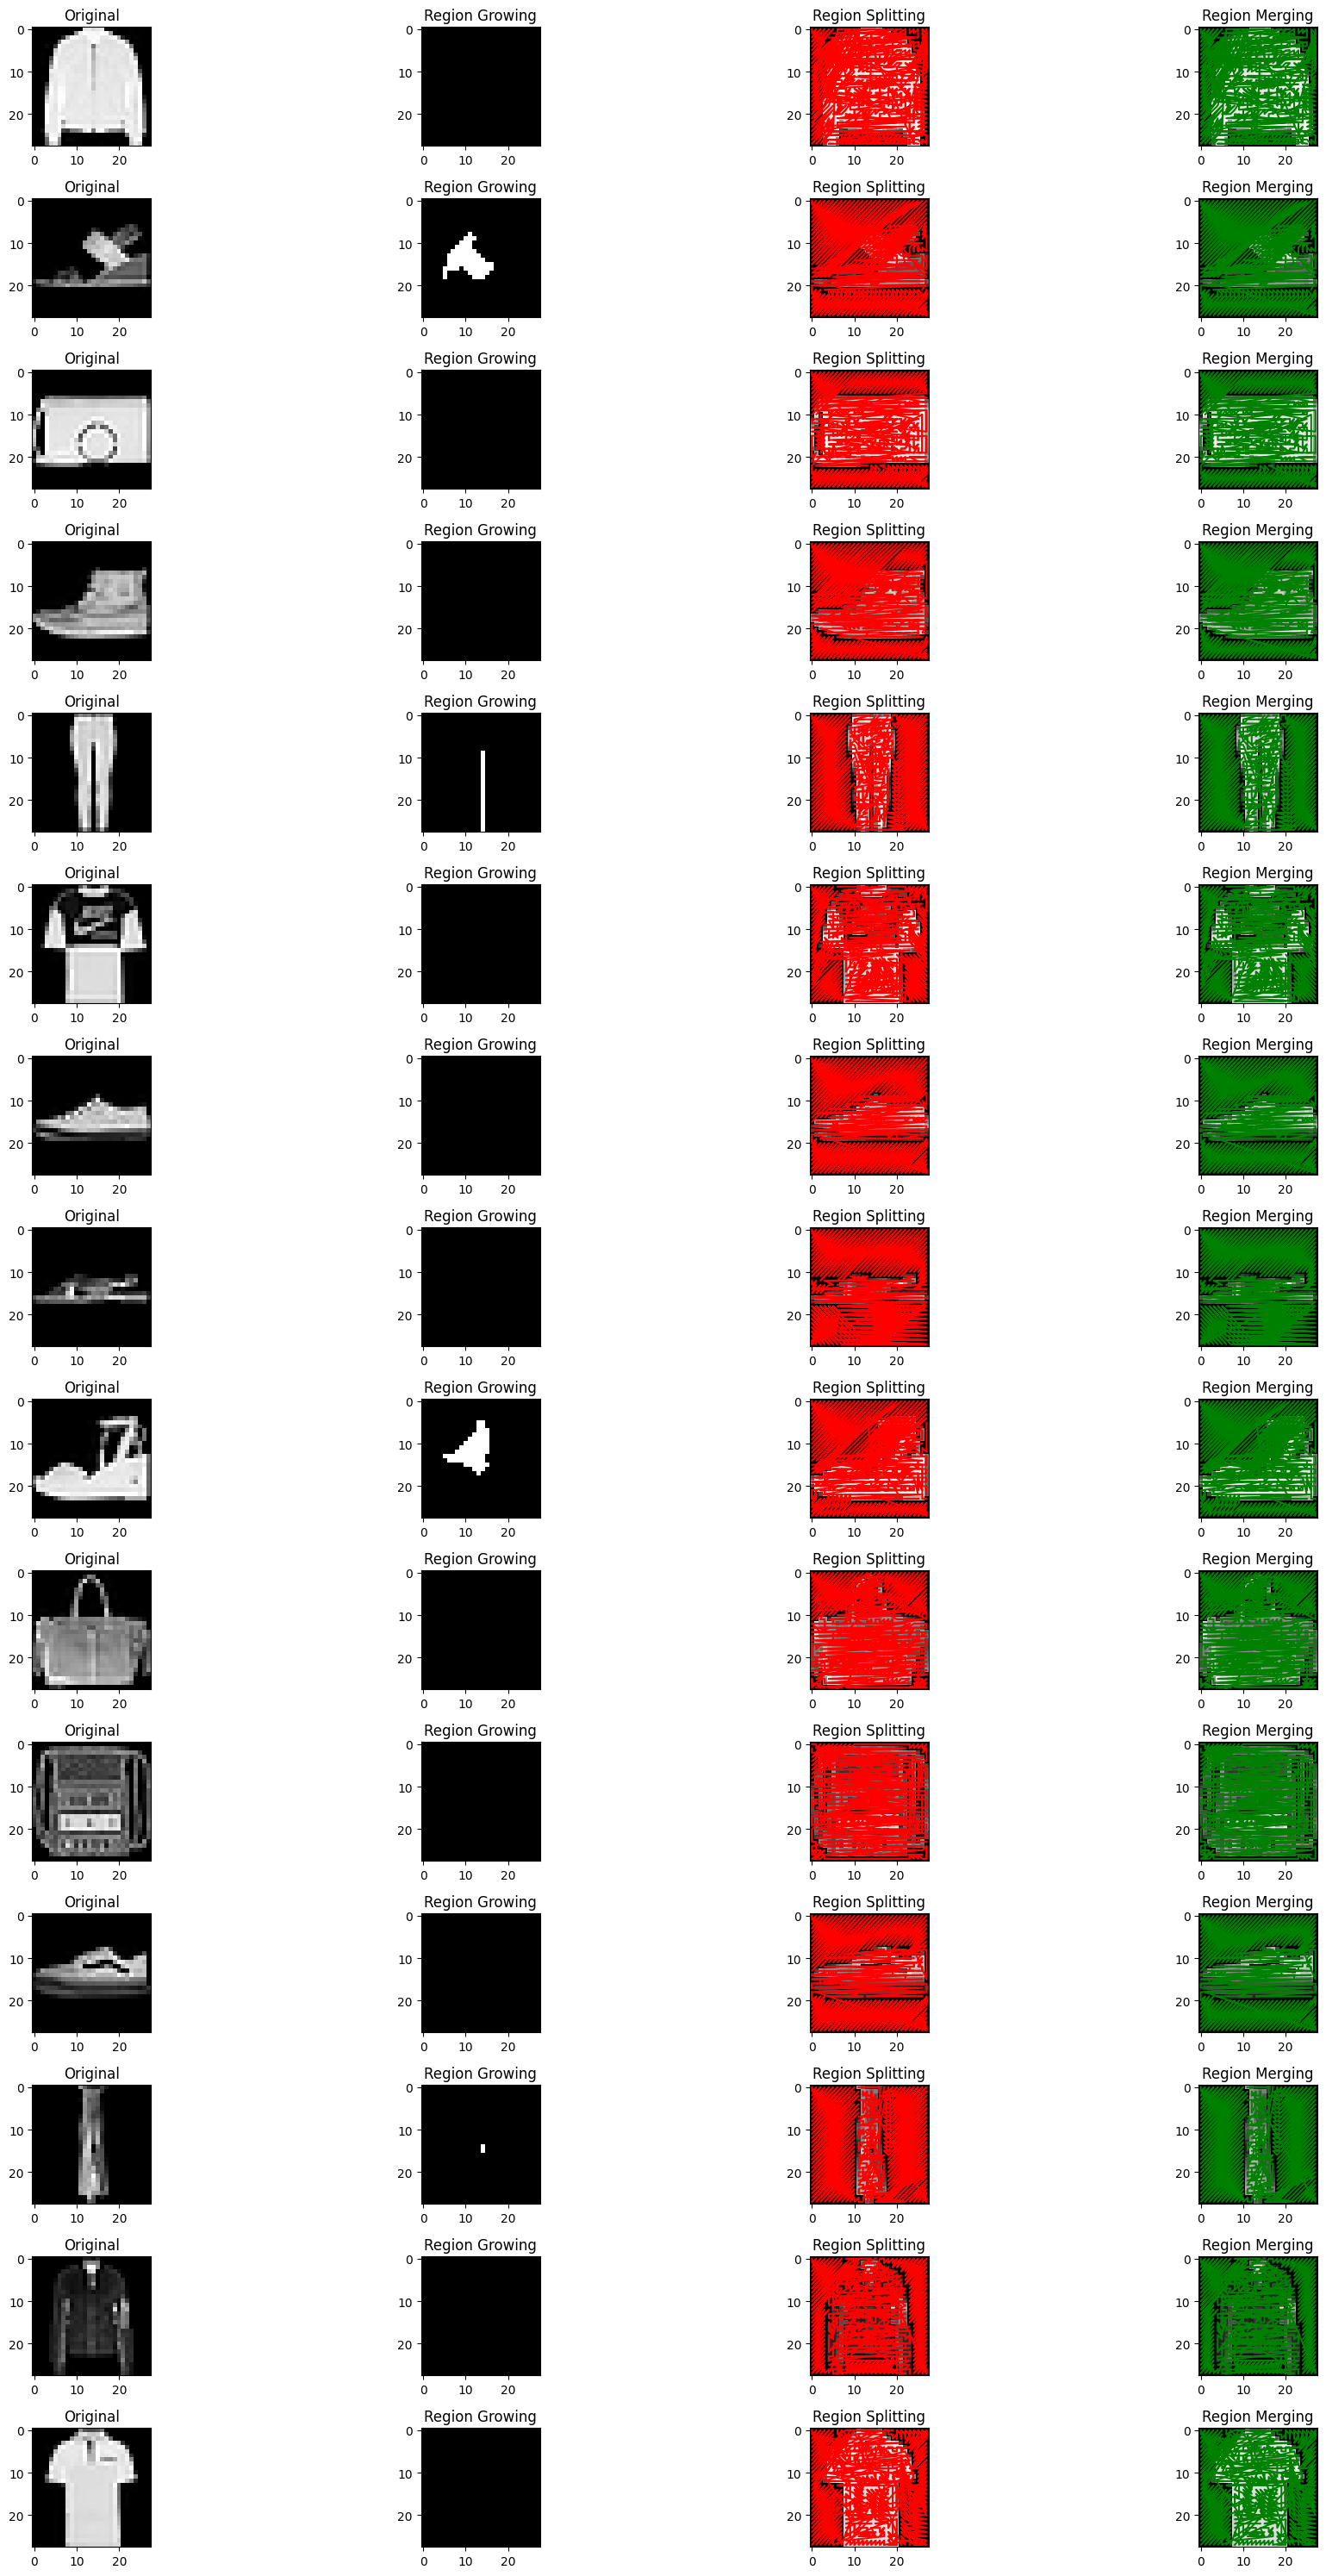

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(train_images, _), _ = fashion_mnist.load_data()

def region_growing(image, seed, threshold):
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)
    segmented_image = np.zeros_like(image)

    queue = [seed]
    while queue:
        current_point = queue.pop(0)
        x, y = current_point

        if not visited[x, y]:
            if abs(image[x, y] - np.mean(segmented_image)) < threshold:
                segmented_image[x, y] = 255
                visited[x, y] = True
                if x > 0:
                    queue.append((x - 1, y))
                if x < height - 1:
                    queue.append((x + 1, y))
                if y > 0:
                    queue.append((x, y - 1))
                if y < width - 1:
                    queue.append((x, y + 1))

    return segmented_image
def region_splitting(image, threshold):
    regions = []
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)

    def explore_region(start_point):
        region = []
        queue = [start_point]

        while queue:
            current_point = queue.pop(0)
            x, y = current_point

            if not visited[x, y]:
                visited[x, y] = True
                region.append(current_point)
                if x > 0 and abs(image[x, y] - image[x-1, y]) < threshold:
                    queue.append((x - 1, y))
                if x < height - 1 and abs(image[x, y] - image[x+1, y]) < threshold:
                    queue.append((x + 1, y))
                if y > 0 and abs(image[x, y] - image[x, y-1]) < threshold:
                    queue.append((x, y - 1))
                if y < width - 1 and abs(image[x, y] - image[x, y+1]) < threshold:
                    queue.append((x, y + 1))

        return region

    for i in range(height):
        for j in range(width):
            if not visited[i, j]:
                region = explore_region((i, j))
                regions.append(region)

    return regions
def region_merging(regions, threshold):
    merged_regions = []
    for region in regions:
        mean_intensity = np.mean([train_images[pixel[0], pixel[1]] for pixel in region])
        for merged_region in merged_regions:
            if abs(mean_intensity - np.mean([train_images[pixel[0], pixel[1]] for pixel in merged_region])) < threshold:
                merged_region.extend(region)
                break
        else:
            merged_regions.append(region)
    return merged_regions

random_indices = np.random.randint(0, train_images.shape[0], size=15)

plt.figure(figsize=(20, 30))
for i, idx in enumerate(random_indices):
    random_image = train_images[idx]
    seed_point = (random_image.shape[0] // 2, random_image.shape[1] // 2)
    threshold_rg = 20
    segmented_image_rg = region_growing(random_image, seed_point, threshold_rg)
    threshold_rs = 20
    regions = region_splitting(random_image, threshold_rs)
    merged_regions = region_merging(regions, threshold_rs)
    plt.subplot(15, 4, i * 4 + 1)
    plt.imshow(random_image, cmap='gray')
    plt.title('Original')

    plt.subplot(15, 4, i * 4 + 2)
    plt.imshow(segmented_image_rg, cmap='gray')
    plt.title('Region Growing')

    plt.subplot(15, 4, i * 4 + 3)
    plt.imshow(random_image, cmap='gray')
    for region in regions:
        plt.plot([pixel[1] for pixel in region], [pixel[0] for pixel in region], 'r')
    plt.title('Region Splitting')

    plt.subplot(15, 4, i * 4 + 4)
    plt.imshow(random_image, cmap='gray')
    for region in merged_regions:
        plt.plot([pixel[1] for pixel in region], [pixel[0] for pixel in region], 'g')
    plt.title('Region Merging')

plt.tight_layout()
plt.show()
